<a href="https://colab.research.google.com/github/akashnarwal7/Walmart-kaggle-Compitetion/blob/main/Walmart_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split






In [9]:

storeData=pd.read_csv("/content/drive/MyDrive/walmart kaggle Compitetion/walmart-recruiting-sales-in-stormy-weather/stores.csv")
featureData=pd.read_csv("/content/drive/MyDrive/walmart kaggle Compitetion/walmart-recruiting-sales-in-stormy-weather/features.csv")
trainData=pd.read_csv("/content/drive/MyDrive/walmart kaggle Compitetion/walmart-recruiting-sales-in-stormy-weather/train.csv")
testData=pd.read_csv("/content/drive/MyDrive/walmart kaggle Compitetion/walmart-recruiting-sales-in-stormy-weather/walmartTest.csv")
sampleSubmission=pd.read_csv("/content/drive/MyDrive/walmart kaggle Compitetion/walmart-recruiting-sales-in-stormy-weather/sampleSubmission.csv")



In [23]:
print("store Data ")
print(storeData.loc[storeData['Type']=='A'])
print(" Type B")
print(storeData.loc[storeData['Type']=='B'])
print(" Type C")
storeData.loc[storeData['Type']=='C']

store Data 
    Store Type    Size
0       1    A  151315
1       2    A  202307
3       4    A  205863
5       6    A  202505
7       8    A  155078
10     11    A  207499
12     13    A  219622
13     14    A  200898
18     19    A  203819
19     20    A  203742
23     24    A  203819
25     26    A  152513
26     27    A  204184
27     28    A  206302
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
35     36    A   39910
38     39    A  184109
39     40    A  155083
40     41    A  196321
 Type B
    Store Type    Size
2       3    B   37392
4       5    B   34875
6       7    B   70713
8       9    B  125833
9      10    B  126512
11     12    B  112238
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
20     21    B  140167
21     22    B  119557
22     23    B  114533
24     25    B  128107
28     29    B   93638
34     35    B  103681
44     45    B  118221
 Type C


,Store,Type,Size
29,30,C,42988
36,37,C,39910
37,38,C,39690
41,42,C,39690
42,43,C,41062
43,44,C,39910


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Size'}>]], dtype=object)

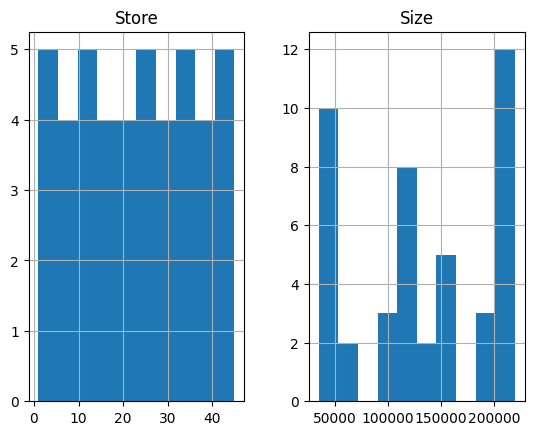

In [33]:
storeData.hist()

In [30]:
storeData['Type'].value_counts()

,count
Type,
A,22
B,17
C,6


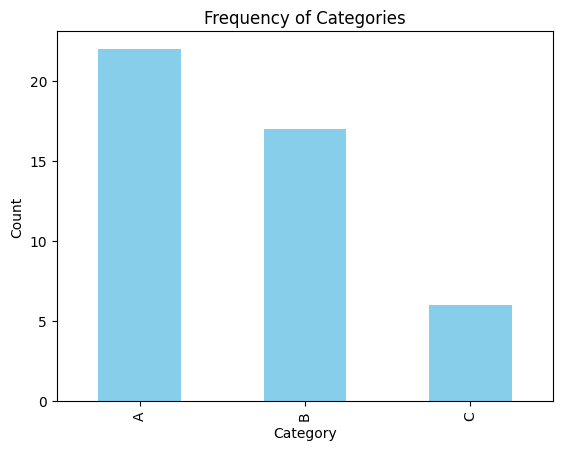

In [32]:
counts=storeData['Type'].value_counts()
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of Categories')
plt.show()

In [11]:
print("fEATURE Data")
featureData.head()

fEATURE Data


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
print(" Train Data ")
trainData.head()

 Train Data 


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [13]:
print("Test Data")
print(testData)

Test Data
        Store  Dept        Date  IsHoliday
0           1     1  02-11-2012      False
1           1     1  09-11-2012      False
2           1     1  16-11-2012      False
3           1     1  23-11-2012       True
4           1     1  30-11-2012      False
...       ...   ...         ...        ...
115059     45    98  28-06-2013      False
115060     45    98  05-07-2013      False
115061     45    98  12-07-2013      False
115062     45    98  19-07-2013      False
115063     45    98  26-07-2013      False

[115064 rows x 4 columns]


In [14]:
print("submission csv Data")
sampleSubmission.head()

submission csv Data


,id,units
0,2_1_2013-04-01,0
1,2_2_2013-04-01,0
2,2_3_2013-04-01,0
3,2_4_2013-04-01,0
4,2_5_2013-04-01,0
